Dataset: Hotels in Munnar, Kerala

Columns:
- Hotel Name: Name of the hotel
- Rating: Rating value
- Rating Description: Short Description of the given rating
- Reviews: No. of reviews
- Star rating: Star rating of the hotel
- Location: Place were the hotel is located
- Nearest Landmark: Landmark near to hotel
- Distance to the Landmark: Distance to the landmark from the hotel(m/km)
- Price: Price(rupees) for 1 Night stay(in Rupees)
- Tax: Tax(rupees) payable for the booking amount

Please Note:

Price given here is for one night (base room).
Tax given here is slapped on top of the price payable. Therefore, total amount = Price + Tax

# import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats


# import data

In [14]:
data = pd.read_csv('munnar.csv')

In [15]:
data.head()

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


# clean data

### handle missing data

In [16]:
data.isnull().sum()

Hotel Name               0
Rating                   0
Rating Description       0
Reviews                  0
Star Rating             17
Location                 0
Nearest Landmark         0
Distance to Landmark     0
Price                    0
Tax                      2
dtype: int64

In [17]:
data.shape[0]

74

In [18]:
data[data.isnull().any(axis=1)]

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
12,Chithirapuram Palace | Rooms & Restaurant\r\nL...,4.5,Excellent,96,NaN,Chithirapuram,city centre,10.8 km,"2,494",634
14,Sn Holiday Home,4.2,Very Good,369,NaN,Anachal,city centre,11.1 km,966,229
16,Landy Queen Homestay | Rooms & Caretaker,4.5,Excellent,188,NaN,Central Munnar,Attukal Waterfalls,1.1 km,"1,279",269
21,Tulsi Village Retreat | Treehouse & Cabin Stay...,3.9,Very Good,352,NaN,Adimali,city centre,21.6 km,"1,545",346
25,Jungle Jive Tree House | Rooms in a Homestay\r...,3.8,Very Good,10,NaN,Munnar,city centre,15.0 km,"5,204","1,134"
26,Abad Copper Castle Hill Valley Resort,4.2,Very Good,366,4.0,Near Pothamedu Viewpoint,city centre,3.3 km,"4,910",NaN
27,Chandys Windy Woods,4.8,Excellent,355,5.0,Chithirapuram,city centre,8.8 km,"9,000",NaN
30,Munnar Ice Queen | Rooms & Cottages\r\nLike a 3,4.7,Excellent,112,NaN,Muthuvaankudi,city centre,13.4 km,"2,410",596
31,Queen Of Munnar | Rooms in a Homestay,2.8,Average,252,NaN,Central Munnar,Attukal Waterfalls,2.2 km,978,156
33,Mercys Munnar Homestay | Room & Caretaker,3.9,Very Good,48,NaN,Munnar,city centre,17.8 km,930,290


In [19]:
# drop star rating column
data.drop(['Star Rating'], axis=1, inplace=True)
data.head()

,Hotel Name,Rating,Rating Description,Reviews,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [20]:
data.isnull().sum()

Hotel Name              0
Rating                  0
Rating Description      0
Reviews                 0
Location                0
Nearest Landmark        0
Distance to Landmark    0
Price                   0
Tax                     2
dtype: int64

In [21]:
data.dropna(inplace=True)

### check duplicates

In [22]:
# count duplicate rows
data.duplicated().sum()

0

### rename columns

In [23]:
data.rename(columns={
    'Rating Description': 'Rating_Description',
    'Star rating': 'Star_Rating',
    'Nearest Landmark': 'Nearest_Landmark',
    'Distance to Landmark': 'Distance_to_Landmark',
    'Price': 'Price_Rupees',
    'Tax': 'Tax_Rupees'
}, inplace=True)
data.head()

,Hotel Name,Rating,Rating_Description,Reviews,Location,Nearest_Landmark,Distance_to_Landmark,Price_Rupees,Tax_Rupees
0,Gokulam Park,4.1,Very Good,1058,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


### convert types

In [24]:
data.dtypes

Hotel Name               object
Rating                  float64
Rating_Description       object
Reviews                   int64
Location                 object
Nearest_Landmark         object
Distance_to_Landmark     object
Price_Rupees             object
Tax_Rupees               object
dtype: object

In [25]:
data['Price_Rupees'] = data['Price_Rupees'].str.replace(',', '').astype(float)

In [26]:
data['Tax_Rupees'] = data['Tax_Rupees'].str.replace(',', '').astype(float)

In [29]:
# some of the distances have 'km' in them, remove it and multiply by 1000
# if they have 'm' in them, just remove the 'm'

for row, col in data.iterrows():
    dist = data.loc[row, 'Distance_to_Landmark']
    if 'km' in dist:
        dist = dist.replace('km', '')
        dist = float(dist) * 1000
    elif 'm' in dist:
        dist = dist.replace('m', '')
    data.at[row, 'Distance_to_Landmark'] = str(dist)
data.head()

,Hotel Name,Rating,Rating_Description,Reviews,Location,Nearest_Landmark,Distance_to_Landmark,Price_Rupees,Tax_Rupees
0,Gokulam Park,4.1,Very Good,1058,Chithirapuram,city centre,10200.0,2728.0,574.0
1,Sterling Munnar,3.8,Very Good,1088,Chinnakanal,city centre,19200.0,4451.0,969.0
2,Issacs Residency,4.1,Very Good,322,Central Munnar,Attukal Waterfalls,950,2758.0,684.0
3,Tea Valley Resort,4.3,Excellent,1337,Pallivasal,city centre,4800.0,2675.0,756.0
4,Grand Plaza,4.3,Excellent,1058,Moolakadai,Attukal Waterfalls,1900.0,3203.0,654.0


In [30]:
# change type of distance column to float
data['Distance_to_Landmark'] = data['Distance_to_Landmark'].astype(float)
data.head()

,Hotel Name,Rating,Rating_Description,Reviews,Location,Nearest_Landmark,Distance_to_Landmark,Price_Rupees,Tax_Rupees
0,Gokulam Park,4.1,Very Good,1058,Chithirapuram,city centre,10200.0,2728.0,574.0
1,Sterling Munnar,3.8,Very Good,1088,Chinnakanal,city centre,19200.0,4451.0,969.0
2,Issacs Residency,4.1,Very Good,322,Central Munnar,Attukal Waterfalls,950.0,2758.0,684.0
3,Tea Valley Resort,4.3,Excellent,1337,Pallivasal,city centre,4800.0,2675.0,756.0
4,Grand Plaza,4.3,Excellent,1058,Moolakadai,Attukal Waterfalls,1900.0,3203.0,654.0


In [31]:
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [32]:
data.dtypes

Hotel Name               object
Rating                  float64
Rating_Description       object
Reviews                   int64
Location                 object
Nearest_Landmark         object
Distance_to_Landmark    float64
Price_Rupees            float64
Tax_Rupees              float64
dtype: object

In [33]:
# rename column distance_to_landmark to distance_to_landmark_meters
data.rename(columns={'Distance_to_Landmark': 'Distance_to_Landmark_meters'}, inplace=True)
data.head()

,Hotel Name,Rating,Rating_Description,Reviews,Location,Nearest_Landmark,Distance_to_Landmark_meters,Price_Rupees,Tax_Rupees
0,Gokulam Park,4.1,Very Good,1058,Chithirapuram,city centre,10200.0,2728.0,574.0
1,Sterling Munnar,3.8,Very Good,1088,Chinnakanal,city centre,19200.0,4451.0,969.0
2,Issacs Residency,4.1,Very Good,322,Central Munnar,Attukal Waterfalls,950.0,2758.0,684.0
3,Tea Valley Resort,4.3,Excellent,1337,Pallivasal,city centre,4800.0,2675.0,756.0
4,Grand Plaza,4.3,Excellent,1058,Moolakadai,Attukal Waterfalls,1900.0,3203.0,654.0


# exploratory analysis

In [34]:
data.columns

Index(['Hotel Name', 'Rating', 'Rating_Description', 'Reviews', 'Location',
       'Nearest_Landmark', 'Distance_to_Landmark_meters', 'Price_Rupees',
       'Tax_Rupees'],
      dtype='object')

In [35]:
# display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 73
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hotel Name                   72 non-null     object 
 1   Rating                       72 non-null     float64
 2   Rating_Description           72 non-null     object 
 3   Reviews                      72 non-null     int64  
 4   Location                     72 non-null     object 
 5   Nearest_Landmark             72 non-null     object 
 6   Distance_to_Landmark_meters  72 non-null     float64
 7   Price_Rupees                 72 non-null     float64
 8   Tax_Rupees                   72 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.7+ KB


In [36]:
data.describe()

,Rating,Reviews,Distance_to_Landmark_meters,Price_Rupees,Tax_Rupees
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,4.056944,376.236111,10646.111111,3899.666667,954.180556
std,0.396757,388.759982,7048.785243,2652.505507,797.248037
min,2.800000,6.000000,440.000000,930.000000,156.000000
25%,3.900000,109.750000,3850.000000,2248.250000,500.500000
50%,4.100000,233.500000,10850.000000,2881.000000,684.000000
75%,4.300000,438.500000,14400.000000,4866.750000,983.250000
max,4.700000,1934.000000,23800.000000,11974.000000,4617.000000


### Data visualization

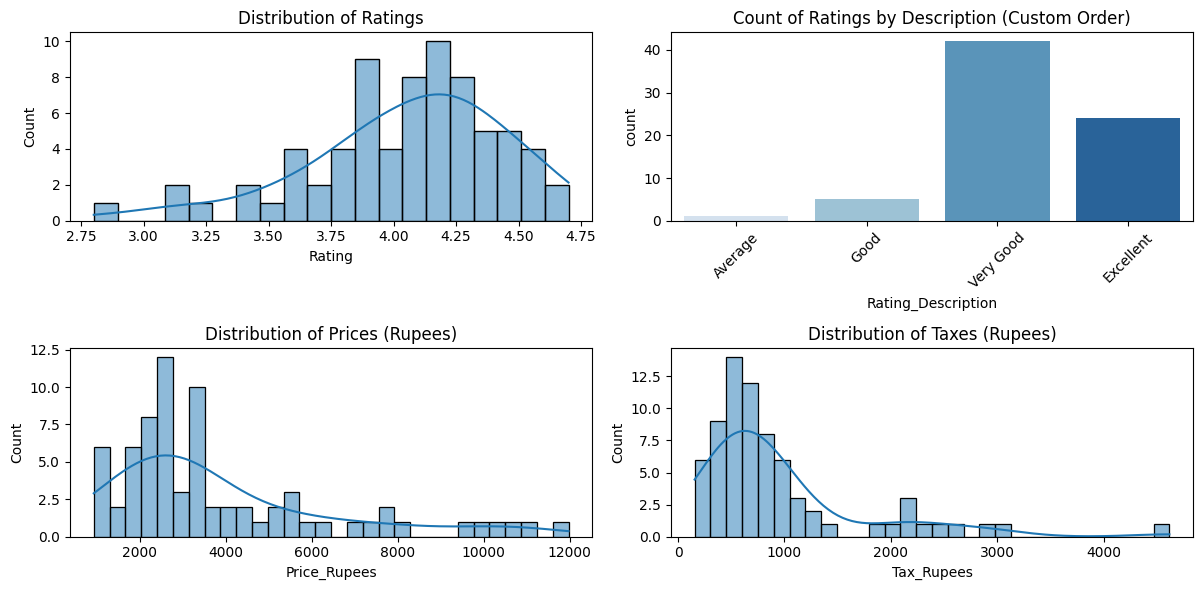

In [42]:
# Data Visualization
plt.figure(figsize=(12, 6))

# Define a custom color palette
custom_order = ["Average", "Good", "Very Good", "Excellent"]
custom_palette = sns.color_palette("Blues", len(custom_order))

# Histogram of Ratings
plt.subplot(2, 2, 1)
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')

# Countplot of Rating Descriptions with custom order and colors
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Rating_Description', order=custom_order, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Count of Ratings by Description (Custom Order)')

# Distribution of Prices
plt.subplot(2, 2, 3)
sns.histplot(data['Price_Rupees'], bins=30, kde=True)
plt.title('Distribution of Prices (Rupees)')

# Distribution of Taxes
plt.subplot(2, 2, 4)
sns.histplot(data['Tax_Rupees'], bins=30, kde=True)
plt.title('Distribution of Taxes (Rupees)')

plt.tight_layout()
plt.show()
